In [63]:
import pandas as pd
import matplotlib.pyplot as plt

In [64]:
df_taipei = pd.read_csv("../../all_data/主資料集/台北市_10101_11303_房價data.csv")

In [65]:
# 將日期轉乘datetime格式
df_taipei['transaction_date'] = pd.to_datetime(df_taipei['transaction_date'])

# 新增一個月頻率的欄位，用來合併經濟指標用的
df_taipei['year_month_for_combine'] = df_taipei['transaction_date'].dt.to_period('M')

In [66]:
# 計算adject_per_ping 以總價/總坪
df_taipei['adject_per_ping'] = df_taipei['total_price'] / df_taipei['total_area_ping']

In [67]:
dd = pd.read_excel("../../all_data/修改後_經濟數據/201101_202405_台灣中鋼_H型鋼原物料價.xlsx")

In [68]:
# 資料表格都相同，所以寫成函式做轉換
# 長表轉寬表
def convert_table(table):
    new_t = table.pivot_table('數值', index='年月', columns='名稱')
    return new_t
# 代號名稱對應表
def mapping_list(table):
    mapping_list_table = table[['名稱', '代號']]
    uni_set = set()
    # dataframe跟dict很像，要.values才會是值，不然預設會取到column的名稱(相對於dict也就是key的概念)
    for index, value in enumerate(mapping_list_table.values):
        uni_set.add((mapping_list_table['代號'].iloc[index], mapping_list_table['名稱'].iloc[index]))
    return list(uni_set)

In [69]:
dd = convert_table(dd)

In [70]:
dd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 161 entries, 2011/01 to 2024/05
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   H型鋼(頓)(TWD)      161 non-null    float64
 1   鋼板-中鋼基價(頓)(TWD)  161 non-null    float64
dtypes: float64(2)
memory usage: 3.8+ KB


In [71]:
# 要把mm_all的index新增成一個欄位，並把他的資料型態轉為period[M]，用以與主資料集進行合併
append_col = dd.index
append_col = pd.Series(append_col, index=dd.index)
dd['date'] = append_col
dd['date'] =  pd.to_datetime(dd['date'])
dd['date'] = dd['date'].dt.to_period('M')

# 合併兩表格
final_df = pd.merge(df_taipei, dd, left_on='year_month_for_combine', right_on='date', how='inner')

C:\Users\Tony\AppData\Local\Temp\ipykernel_2816\3741949400.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dd['date'] =  pd.to_datetime(dd['date'])


In [72]:
df_taipei.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243176 entries, 0 to 243175
Data columns (total 33 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   Unnamed: 0                     243176 non-null  int64         
 1   usage_category                 242958 non-null  object        
 2   address                        243176 non-null  object        
 3   property_type                  243174 non-null  object        
 4   community_name                 136206 non-null  object        
 5   main_building_ratio            227424 non-null  float64       
 6   city                           243176 non-null  object        
 7   parking_space_price            38223 non-null   float64       
 8   transaction_date               243176 non-null  datetime64[ns]
 9   elevator_available             83323 non-null   float64       
 10  building_age                   196408 non-null  float64       
 11  

In [73]:
time_EDA = final_df[['date', 'adject_per_ping', 'H型鋼(頓)(TWD)', '鋼板-中鋼基價(頓)(TWD)']]

In [74]:
time_EDA = time_EDA.groupby('date').mean()

In [75]:
time_EDA

,adject_per_ping,H型鋼(頓)(TWD),鋼板-中鋼基價(頓)(TWD)
date,,,
2012-01,624593.010516,25600.0,24000.0
2012-02,696904.733921,25600.0,24000.0
2012-03,649579.894638,25600.0,24000.0
2012-04,684631.719907,26000.0,24500.0
2012-05,807989.789614,26000.0,24500.0
...,...,...,...
2023-11,716150.456531,25850.0,30379.0
2023-12,717640.939667,25850.0,30379.0
2024-01,870272.889745,25850.0,31179.0


In [76]:
# 將Series轉成dataframe
time_EDA = time_EDA.reset_index()
# period[M]轉回datetime才能畫圖
time_EDA['date'] = time_EDA['date'].dt.to_timestamp()

In [77]:
time_EDA

,date,adject_per_ping,H型鋼(頓)(TWD),鋼板-中鋼基價(頓)(TWD)
0,2012-01-01,624593.010516,25600.0,24000.0
1,2012-02-01,696904.733921,25600.0,24000.0
2,2012-03-01,649579.894638,25600.0,24000.0
3,2012-04-01,684631.719907,26000.0,24500.0
4,2012-05-01,807989.789614,26000.0,24500.0
...,...,...,...,...
142,2023-11-01,716150.456531,25850.0,30379.0
143,2023-12-01,717640.939667,25850.0,30379.0
144,2024-01-01,870272.889745,25850.0,31179.0
145,2024-02-01,723799.597018,25850.0,31179.0


c:\Users\Tony\anaconda3\envs\web_scraping\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 22411 (\N{CJK UNIFIED IDEOGRAPH-578B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Tony\anaconda3\envs\web_scraping\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 37628 (\N{CJK UNIFIED IDEOGRAPH-92FC}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Tony\anaconda3\envs\web_scraping\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 38931 (\N{CJK UNIFIED IDEOGRAPH-9813}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Tony\anaconda3\envs\web_scraping\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20729 (\N{CJK UNIFIED IDEOGRAPH-50F9}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Tony\anaconda3\envs\web_scraping\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 26684 (\N{CJK

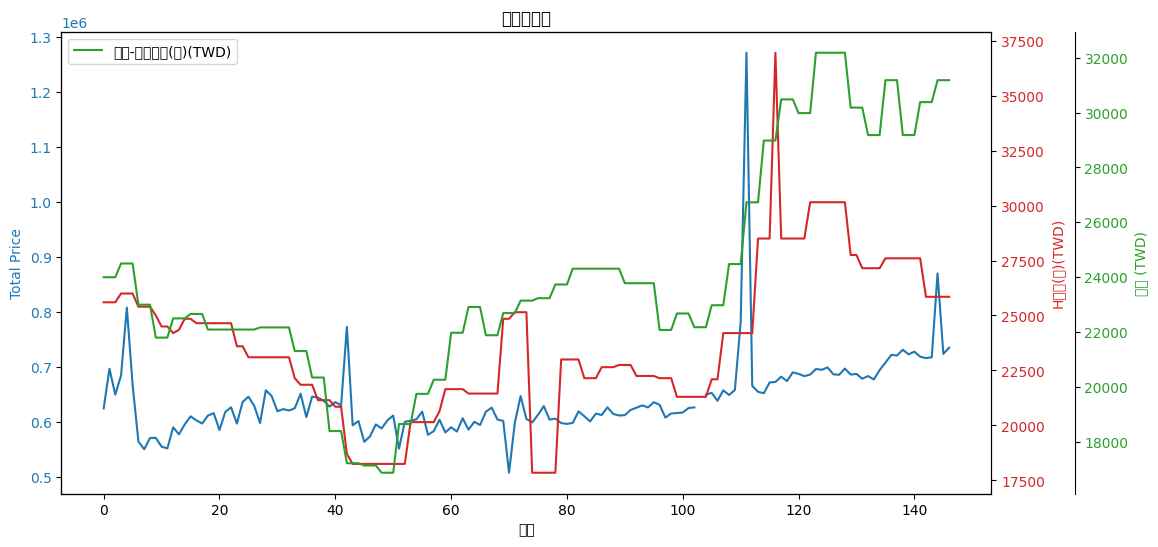

<Figure size 640x480 with 0 Axes>

In [79]:
# 繪圖
fig, ax1 = plt.subplots(figsize=(12, 6))

# 繪製total_price曲線
color = 'tab:blue'
ax1.set_xlabel('日期')
ax1.set_ylabel('Total Price', color=color)
ax1.plot(time_EDA.index, time_EDA['adject_per_ping'], label='Total Price', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# # 創建第二個y軸，並繪製H型鋼(頓)(TWD)曲線
ax2 = ax1.twinx()  
color = 'tab:red'
ax2.set_ylabel('H型鋼(頓)(TWD)', color=color)
ax2.plot(time_EDA.index, time_EDA['H型鋼(頓)(TWD)'], label='H型鋼(頓)(TWD)', color=color)
ax2.tick_params(axis='y', labelcolor=color)

# 繪製鋼板-中鋼基價(頓)(TWD)曲線
# 創建第三個y軸，並繪製鋼板-中鋼基價(頓)(TWD)曲線
ax3 = ax1.twinx()  
color = 'tab:green'
ax3.spines['right'].set_position(('outward', 60))  # 移動第三個y軸
ax3.set_ylabel('鋼板-中鋼基價(頓)(TWD)', color=color)
ax3.plot(time_EDA.index, time_EDA['鋼板-中鋼基價(頓)(TWD)'], label='鋼板-中鋼基價(頓)(TWD)', color=color)
ax3.tick_params(axis='y', labelcolor=color)

# 設置標題和標籤
plt.title('價格走勢圖')
plt.xlabel('日期')
plt.ylabel('價格 (TWD)')
plt.legend()

# 顯示圖表
plt.show()

# 保存圖片
plt.savefig('price_trends.svg')

In [83]:
!pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


In [84]:
import seaborn as sns

c:\Users\Tony\anaconda3\envs\web_scraping\lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 22411 (\N{CJK UNIFIED IDEOGRAPH-578B}) missing from current font.
  fig.canvas.draw()
c:\Users\Tony\anaconda3\envs\web_scraping\lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 37628 (\N{CJK UNIFIED IDEOGRAPH-92FC}) missing from current font.
  fig.canvas.draw()
c:\Users\Tony\anaconda3\envs\web_scraping\lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 38931 (\N{CJK UNIFIED IDEOGRAPH-9813}) missing from current font.
  fig.canvas.draw()
c:\Users\Tony\anaconda3\envs\web_scraping\lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 26495 (\N{CJK UNIFIED IDEOGRAPH-677F}) missing from current font.
  fig.canvas.draw()
c:\Users\Tony\anaconda3\envs\web_scraping\lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 20013 (\N{CJK UNIFIED IDEOGRAPH-4E2D}) missing from current font.
  fig.canvas.draw()
c:\Users\Tony\anaconda3\envs\web_scraping\lib\site-packages\seaborn\ut

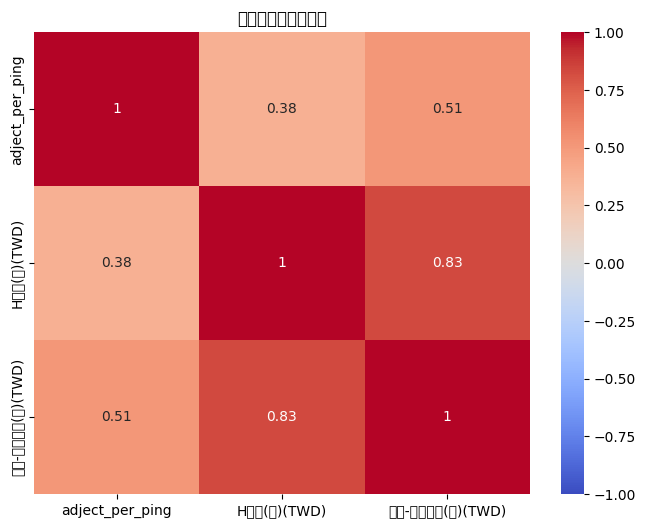

In [86]:
# 計算相關係數
correlation_matrix = time_EDA[['adject_per_ping', 'H型鋼(頓)(TWD)', '鋼板-中鋼基價(頓)(TWD)']].corr()

# 繪製相關係數熱力圖
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('價格相關係數熱力圖')
plt.show()